In [ ]:
def create_sequences(data, labels, sequence_length=100):
    sequence_data = []
    sequence_labels = []
    for i in range(len(data) - sequence_length):
        sequence_data.append(data[i:i+sequence_length])
        sequence_labels.append(labels[i+sequence_length-1])
    return np.array(sequence_data), np.array(sequence_labels)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('/content/drive/MyDrive/7th sem Project/Final Vibration Data.csv')

# Keeping only the columns related to Pump1 and Pump4
data = data[['Pump1 vibration', 'Pump4 vibration']]

# Melting the DataFrame and labeling the data
melted_data = data.melt(var_name='Label', value_name='Vibration')
melted_data['Label'] = melted_data['Label'].apply(lambda x: 'Healthy' if x == 'Pump1 vibration' else 'Faulty')

# Normalizing and encoding labels
scaler = MinMaxScaler(feature_range=(-0.5,+0.5))
melted_data['Vibration'] = scaler.fit_transform(melted_data[['Vibration']])
label_encoder = LabelEncoder()
melted_data['Label'] = label_encoder.fit_transform(melted_data['Label'])
# Displaying basic information and the first few rows of the DataFrame
melted_data.info()
melted_data.head()
# Creating sequences and splitting data
seq_length = 100  # Using a smaller sequence length for faster training
X, y = create_sequences(melted_data['Vibration'],melted_data['Label'], seq_length)  # You need to define the create_sequences function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Shapes of train and test data:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199998 entries, 0 to 199997
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Label      199998 non-null  int64  
 1   Vibration  199998 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.1 MB


Exception ignored in: <function _xla_gc_callback at 0x7a5d28e9cb80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Shapes of train and test data:
(159918, 100, 1) (39980, 100, 1) (159918,) (39980,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Building the LSTM model for temperature data
model = Sequential()

model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model_temp.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=5,  # You can increase the number of epochs
    batch_size=128,
    validation_split=0.2,
    shuffle=False,
)




Epoch 1/5
1000/1000 [==============================] - 88s 86ms/step - loss: 0.6729 - accuracy: 0.5639 - val_loss: 0.6869 - val_accuracy: 0.5922
Epoch 2/5
1000/1000 [==============================] - 82s 82ms/step - loss: 0.6500 - accuracy: 0.6342 - val_loss: 0.3166 - val_accuracy: 0.8757
Epoch 3/5
1000/1000 [==============================] - 85s 85ms/step - loss: 0.3624 - accuracy: 0.7947 - val_loss: 0.6695 - val_accuracy: 0.4968
Epoch 4/5
1000/1000 [==============================] - 84s 84ms/step - loss: 0.6417 - accuracy: 0.6292 - val_loss: 0.6478 - val_accuracy: 0.6713
Epoch 5/5
1000/1000 [==============================] - 85s 85ms/step - loss: 0.5558 - accuracy: 0.7089 - val_loss: 0.1162 - val_accuracy: 0.9617


In [ ]:
# Evaluate the model's performance on the testing data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

Test Loss: 0.1109
Test Accuracy: 96.29%


In [ ]:
import numpy as np
# Preprocess and create sequences for the input data
input_data = np.random.uniform(low=-0.5, high=0.5, size=(100))  # Replace with your input data

# Normalize the input data using the same scaler
input_data = scaler.transform(np.array(input_data).reshape(-1, 1))

# Create sequences from the input data
input_sequence = []
for i in range(len(input_data) - seq_length + 1):
    input_sequence.append(input_data[i:i + seq_length])
input_sequence = np.array(input_sequence)

# Reshape the input sequence
input_sequence = input_sequence.reshape((input_sequence.shape[0], input_sequence.shape[1], 1))

# Make a prediction using the model
prediction = model.predict(input_sequence)

# Interpret the prediction
condition = 'Healthy' if (prediction > 0.5).any() else 'Faulty'

print(f"The pump condition is: {condition}")

1/1 [==============================] - 0s 48ms/step
The pump condition is: Faulty


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1250/1250 [==============================] - 15s 12ms/step
              precision    recall  f1-score   support

      Faulty       1.00      0.93      0.96     20021
     Healthy       0.93      1.00      0.96     19959

    accuracy                           0.96     39980
   macro avg       0.97      0.96      0.96     39980
weighted avg       0.97      0.96      0.96     39980



Text(0.5, 1.0, 'Accuracy')

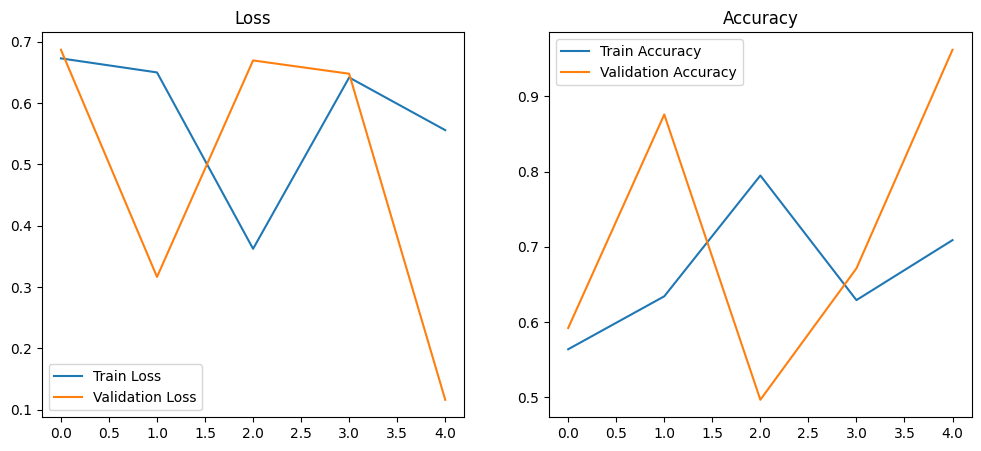

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Getting predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Printing classification report for precision, recall, f1-score metrics
print(classification_report(y_test, y_pred_classes, target_names=['Faulty', 'Healthy']))

# Visualization - Plotting loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')





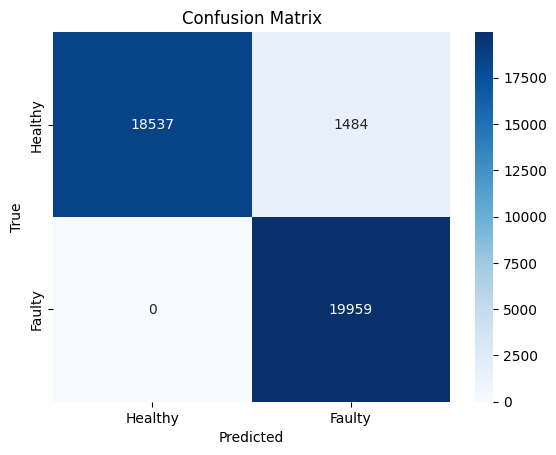

In [ ]:
cm = confusion_matrix(y_test,y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=['Healthy', 'Faulty'], yticklabels=['Healthy', 'Faulty'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predict on the test data
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

1250/1250 [==============================] - 15s 12ms/step
Accuracy: 0.9629
Precision: 0.9308
Recall: 1.0000
F1 Score: 0.9642
